In [1]:

import pandas as pd
import numpy as np
import nltk

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/pavlo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
data_raw_path = '../data_raw'

In [4]:
prompts_train = pd.read_csv(f'{data_raw_path}/prompts_train.csv')

In [5]:
summaries_train = pd.read_csv(f'{data_raw_path}/summaries_train.csv')

In [6]:
summaries_train

,student_id,prompt_id,text,content,wording
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757
...,...,...,...,...,...
7160,ff7c7e70df07,ebad26,They used all sorts of chemical concoctions to...,0.205683,0.380538
7161,ffc34d056498,3b9047,The lowest classes are slaves and farmers slav...,-0.308448,0.048171
7162,ffd1576d2e1b,3b9047,they sorta made people start workin...,-1.408180,-0.493603
7163,ffe4a98093b2,39c16e,An ideal tragety has three elements that make ...,-0.393310,0.627128


In [7]:
prompts_train

,prompt_id,prompt_question,prompt_title,prompt_text
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
1,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
2,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."


In [8]:
all_df = prompts_train.merge(summaries_train, on='prompt_id')

In [9]:
all_df

,prompt_id,prompt_question,prompt_title,prompt_text,student_id,text,content,wording
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00791789cc1f,1 element of an ideal tragedy is that it shoul...,-0.210614,-0.471415
1,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0086ef22de8f,The three elements of an ideal tragedy are: H...,-0.970237,-0.417058
2,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0094589c7a22,Aristotle states that an ideal tragedy should ...,-0.387791,-0.584181
3,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00cd5736026a,One element of an Ideal tragedy is having a co...,0.088882,-0.594710
4,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00d98b8ff756,The 3 ideal of tragedy is how complex you need...,-0.687288,-0.460886
...,...,...,...,...,...,...,...,...
7160,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff37545b2805,"In paragraph two, they would use pickle meat a...",1.520355,-0.292990
7161,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff4ed38ef099,"in the first paragraph it says ""either can it...",-1.204574,-1.169784
7162,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff53b94f7ce0,They would have piles of filthy meat on the fl...,0.328739,-1.053294
7163,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff7c7e70df07,They used all sorts of chemical concoctions to...,0.205683,0.380538


In [10]:
print(all_df['prompt_question'][0])

Summarize at least 3 elements of an ideal tragedy, as described by Aristotle.


In [11]:
print(all_df['prompt_text'][0])

Chapter 13 
As the sequel to what has already been said, we must proceed to consider what the poet should aim at, and what he should avoid, in constructing his plots; and by what means the specific effect of Tragedy will be produced. 
A perfect tragedy should, as we have seen, be arranged not on the simple but on the complex plan. It should, moreover, imitate actions which excite pity and fear, this being the distinctive mark of tragic imitation. It follows plainly, in the first place, that the change of fortune presented must not be the spectacle of a virtuous man brought from prosperity to adversity: for this moves neither pity nor fear; it merely shocks us. Nor, again, that of a bad man passing from adversity to prosperity: for nothing can be more alien to the spirit of Tragedy; it possesses no single tragic quality; it neither satisfies the moral sense nor calls forth pity or fear. Nor, again, should the downfall of the utter villain be exhibited. A plot of this kind would, doubtle

In [12]:
print(all_df['text'][0])

1 element of an ideal tragedy is that it should be arranged on a complex plan.  Another element of an ideal tragedy is that it should only have one main issue. The last element of an ideal tragedy is that it should have a double thread plot and an opposite catastrophe for both good and bad.


In [13]:
summaries_train

,student_id,prompt_id,text,content,wording
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757
...,...,...,...,...,...
7160,ff7c7e70df07,ebad26,They used all sorts of chemical concoctions to...,0.205683,0.380538
7161,ffc34d056498,3b9047,The lowest classes are slaves and farmers slav...,-0.308448,0.048171
7162,ffd1576d2e1b,3b9047,they sorta made people start workin...,-1.408180,-0.493603
7163,ffe4a98093b2,39c16e,An ideal tragety has three elements that make ...,-0.393310,0.627128


In [14]:
summaries_test = pd.read_csv(f'{data_raw_path}/summaries_test.csv')

In [15]:
summaries_test

,student_id,prompt_id,text
0,000000ffffff,abc123,Example text 1
1,111111eeeeee,def789,Example text 2
2,222222cccccc,abc123,Example text 3
3,333333dddddd,def789,Example text 4


In [16]:
prompts_test = pd.read_csv(f'{data_raw_path}/prompts_test.csv')

In [17]:
prompts_test

,prompt_id,prompt_question,prompt_title,prompt_text
0,abc123,Summarize...,Example Title 1,Heading\nText...
1,def789,Summarize...,Example Title 2,Heading\nText...


In [18]:
all_df.loc[:, 'prompt_question_tokens'] = all_df['prompt_question'].map(lambda x: len(nltk.word_tokenize(x)))
all_df.loc[:, 'prompt_text_tokens'] = all_df['prompt_text'].map(lambda x: len(nltk.word_tokenize(x)))
all_df.loc[:, 'text_tokens'] = all_df['text'].map(lambda x: len(nltk.word_tokenize(x)))

In [19]:
all_df['prompt_question_tokens'].mean(), all_df['prompt_question_tokens'].max(), all_df['prompt_question_tokens'].min()

(21.64884856943475, 31, 15)

In [20]:
all_df['prompt_text_tokens'].mean(), all_df['prompt_text_tokens'].max(), all_df['prompt_text_tokens'].min()

(777.2706210746685, 1076, 625)

In [21]:
all_df['text_tokens'].mean(), all_df['text_tokens'].max(), all_df['text_tokens'].min()

(83.56552686671318, 758, 25)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
summaries_train.shape[0]

7165

In [24]:
prompts_train.shape[0]

4

In [25]:
all_df.shape[0]

7165

In [26]:
prompts_train

,prompt_id,prompt_question,prompt_title,prompt_text
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
1,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
2,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."


<Axes: xlabel='wording', ylabel='Count'>

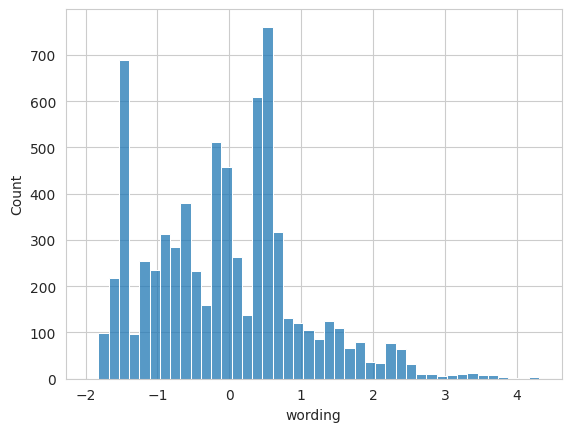

In [27]:
sns.histplot(all_df['wording'])

<Axes: xlabel='content', ylabel='Count'>

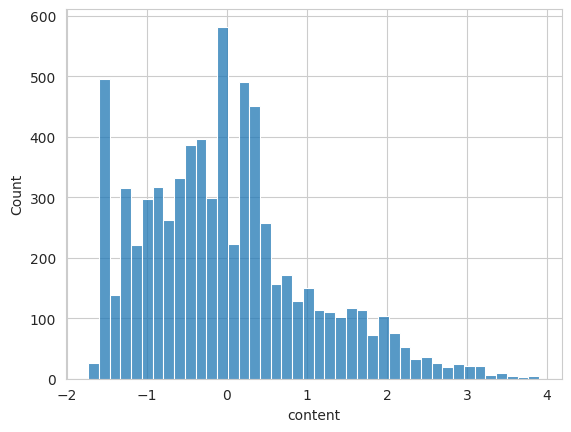

In [28]:
sns.histplot(all_df['content'])

<Axes: xlabel='prompt_title', ylabel='wording'>

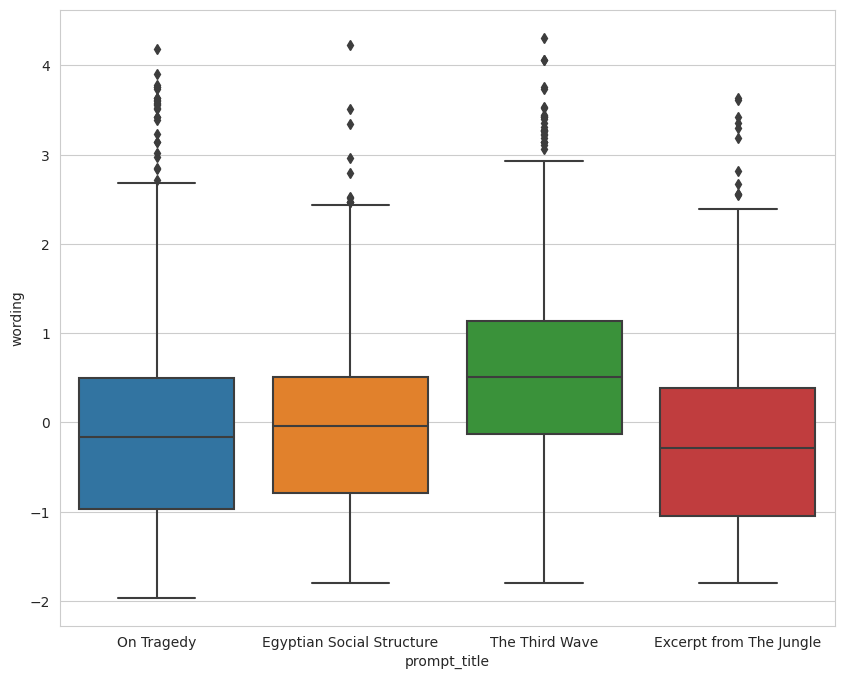

In [29]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=all_df, x='prompt_title', y='wording')

<Axes: xlabel='prompt_title', ylabel='content'>

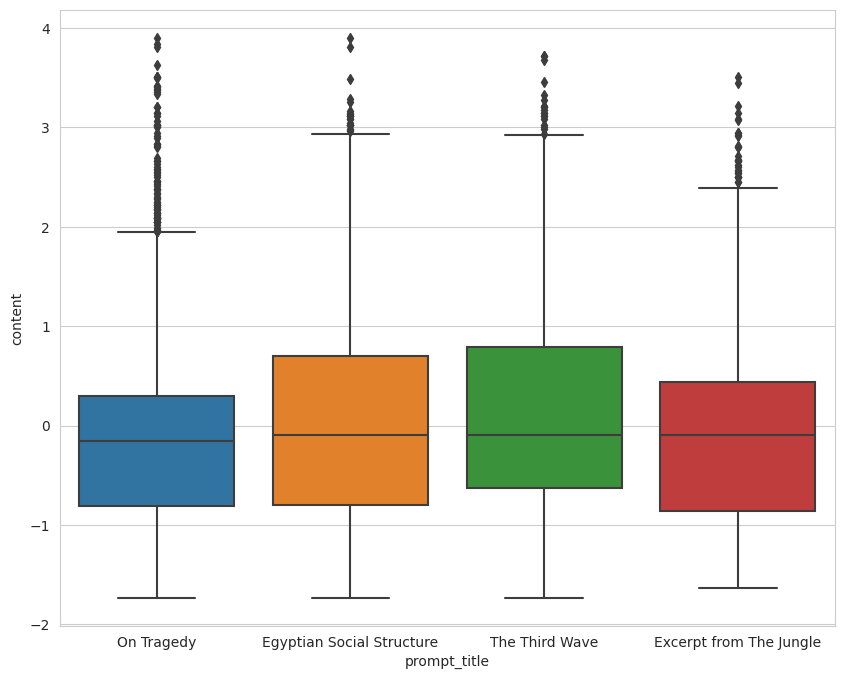

In [30]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=all_df, x='prompt_title', y='content')

In [31]:
len(all_df['student_id'].unique())

7165

In [32]:
all_df.shape[0]

7165

In [33]:
## cv

In [34]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GroupKFold

In [53]:
from sklearn.svm import SVR

In [54]:
from sklearn.pipeline import Pipeline

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
folds = KFold(n_splits=4, random_state=123, shuffle=True)

In [57]:
model = Pipeline(steps = [('vectorizer', TfidfVectorizer(ngram_range=(1,2))), ('model', SVR())])

In [60]:
scoring = 'neg_root_mean_squared_error'

In [61]:
res1 = cross_val_score(model, all_df['text'], all_df['wording'], cv=folds, scoring=scoring)

In [62]:
res2 = cross_val_score(model, all_df['text'], all_df['content'], cv=folds, scoring=scoring)

In [63]:
res1

array([-0.69844088, -0.68600287, -0.70946608, -0.69027595])

In [64]:
res2

array([-0.57950271, -0.56983694, -0.57975494, -0.59074696])

In [65]:
(res1 + res2)/2

array([-0.63897179, -0.6279199 , -0.64461051, -0.64051145])

In [66]:
np.mean((res1 + res2)/2)

-0.6380034153874761

In [67]:
folds = GroupKFold(n_splits=4)

In [68]:
model = Pipeline(steps = [('vectorizer', TfidfVectorizer(ngram_range=(1,2))), ('model', SVR())])
res1 = cross_val_score(model, X=all_df['text'], y=all_df['wording'], cv=folds, groups=all_df['prompt_title'], scoring=scoring)
res2 = cross_val_score(model, X=all_df['text'], y=all_df['content'], cv=folds, groups=all_df['prompt_title'], scoring=scoring)
print('cv results : ', np.mean((res1 + res2)/2))

cv results :  -0.8934436865683308


In [69]:
res1, res2

(array([-0.87572572, -0.92438422, -1.12177153, -1.06331732]),
 array([-0.81360037, -0.73486771, -0.71006923, -0.90381339]))

In [70]:
np.mean((res1 + res2)/2)

-0.8934436865683308

In [71]:
folds = KFold(n_splits=4, shuffle=False)
model = Pipeline(steps = [('vectorizer', TfidfVectorizer(ngram_range=(1,2))), ('model', SVR())])
res1 = cross_val_score(model, all_df['text'], all_df['wording'], cv=folds, scoring=scoring)
res2 = cross_val_score(model, all_df['text'], all_df['content'], cv=folds, scoring=scoring)

In [72]:
res1, res2

(array([-0.7441767 , -0.73685779, -0.94572471, -0.69443821]),
 array([-0.6001427 , -0.61552814, -0.7968208 , -0.60517144]))

In [73]:
np.mean((res1 + res2)/2)

-0.7173575614732604

In [84]:
from sklearn.metrics import mean_squared_error as mse

In [85]:
def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

In [74]:
n_splits = 4

In [75]:
all_df.loc[:, 'content_cut'] = pd.cut(all_df['content'], bins=n_splits)

In [77]:
all_df.loc[:, 'wording_cut'] = pd.cut(all_df['wording'], bins=n_splits)

In [81]:
all_df.loc[:, 'chunk'] = all_df['wording_cut'].astype(str) + '_' + all_df['content_cut'].astype(str)

In [91]:
folds = StratifiedKFold(n_splits=4)
res = []
for tr_idx, val_idx in folds.split(all_df['text'], all_df['chunk']):

    train_df = all_df.loc[tr_idx,:]
    val_df = all_df.loc[val_idx,:]
    model_1 = Pipeline(steps = [('vectorizer', TfidfVectorizer(ngram_range=(1,2))), ('model', SVR())])
    model_2 = Pipeline(steps = [('vectorizer', TfidfVectorizer(ngram_range=(1,2))), ('model', SVR())])

    model_1.fit(train_df['text'], train_df['content'])
    model_2.fit(train_df['text'], train_df['wording'])

    pred_word = model_2.predict(val_df['text'])
    pred_content = model_2.predict(val_df['text'])

    m1 = rmse(val_df['wording'], pred_word)
    m2 = rmse(val_df['content'], pred_content)

    res.append((m1+m2)/2)


/home/pavlo/anaconda3/envs/CommonLit---Evaluate-Student-Summaries/lib/python3.10/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


In [92]:
np.mean(res)

0.814918672536496

In [93]:
all_df.loc[:, 'average'] = (all_df['wording'] + all_df['content'])/2

In [94]:
all_df.loc[:, 'cut_average'] = pd.cut(all_df['average'], bins=n_splits)

In [96]:
folds = StratifiedKFold(n_splits=4)
res = []
for tr_idx, val_idx in folds.split(all_df['text'], all_df['cut_average'].astype(str)):

    train_df = all_df.loc[tr_idx,:]
    val_df = all_df.loc[val_idx,:]
    model_1 = Pipeline(steps = [('vectorizer', TfidfVectorizer(ngram_range=(1,2))), ('model', SVR())])
    model_2 = Pipeline(steps = [('vectorizer', TfidfVectorizer(ngram_range=(1,2))), ('model', SVR())])

    model_1.fit(train_df['text'], train_df['content'])
    model_2.fit(train_df['text'], train_df['wording'])

    pred_word = model_2.predict(val_df['text'])
    pred_content = model_2.predict(val_df['text'])

    m1 = rmse(val_df['wording'], pred_word)
    m2 = rmse(val_df['content'], pred_content)

    res.append((m1+m2)/2)

In [97]:
res

[0.8441399380010569,
 0.7934351553954596,
 0.9730454569081217,
 0.8601954479559443]

In [98]:
np.mean(res)

0.8677039995651457

In [99]:
n_splits = 5
all_df.loc[:, 'cut_average'] = pd.cut(all_df['average'], bins=n_splits)
folds = StratifiedKFold(n_splits=5)
res = []
for tr_idx, val_idx in folds.split(all_df['text'], all_df['cut_average'].astype(str)):

    train_df = all_df.loc[tr_idx,:]
    val_df = all_df.loc[val_idx,:]
    model_1 = Pipeline(steps = [('vectorizer', TfidfVectorizer(ngram_range=(1,2))), ('model', SVR())])
    model_2 = Pipeline(steps = [('vectorizer', TfidfVectorizer(ngram_range=(1,2))), ('model', SVR())])

    model_1.fit(train_df['text'], train_df['content'])
    model_2.fit(train_df['text'], train_df['wording'])

    pred_word = model_2.predict(val_df['text'])
    pred_content = model_2.predict(val_df['text'])

    m1 = rmse(val_df['wording'], pred_word)
    m2 = rmse(val_df['content'], pred_content)

    res.append((m1+m2)/2)

In [100]:
res

[0.7237222245531632,
 0.7473269861092566,
 0.7921739874035929,
 0.8219702900852623,
 0.7477746432755658]

In [101]:
np.mean(res)

0.7665936262853681

In [104]:
n_splits = 10
all_df.loc[:, 'cut_average'] = pd.cut(all_df['average'], bins=n_splits)
folds = StratifiedKFold(n_splits=n_splits)
res = []
for tr_idx, val_idx in folds.split(all_df['text'], all_df['cut_average'].astype(str)):

    train_df = all_df.loc[tr_idx,:]
    val_df = all_df.loc[val_idx,:]
    model_1 = Pipeline(steps = [('vectorizer', TfidfVectorizer(ngram_range=(1,2))), ('model', SVR())])
    model_2 = Pipeline(steps = [('vectorizer', TfidfVectorizer(ngram_range=(1,2))), ('model', SVR())])

    model_1.fit(train_df['text'], train_df['content'])
    model_2.fit(train_df['text'], train_df['wording'])

    pred_word = model_2.predict(val_df['text'])
    pred_content = model_2.predict(val_df['text'])

    m1 = rmse(val_df['wording'], pred_word)
    m2 = rmse(val_df['content'], pred_content)

    res.append((m1+m2)/2)

In [106]:
np.mean(res)

0.7345575977867238

In [107]:
from sklearn.preprocessing import MaxAbsScaler

In [108]:
n_splits = 4
all_df.loc[:, 'cut_average'] = pd.cut(all_df['average'], bins=n_splits)
folds = StratifiedKFold(n_splits=n_splits)
res = []
for tr_idx, val_idx in folds.split(all_df['text'], all_df['cut_average'].astype(str)):

    train_df = all_df.loc[tr_idx,:]
    val_df = all_df.loc[val_idx,:]
    model_1 = Pipeline(steps = [('vectorizer', TfidfVectorizer(ngram_range=(1,2))), ('model', SVR())])
    model_2 = Pipeline(steps = [('vectorizer', TfidfVectorizer(ngram_range=(1,2))), ('model', SVR())])

    model_1.fit(train_df['text'], train_df['content'])
    model_2.fit(train_df['text'], train_df['wording'])

    pred_word = model_2.predict(val_df['text'])
    pred_content = model_2.predict(val_df['text'])

    m1 = rmse(val_df['wording'], pred_word)
    m2 = rmse(val_df['content'], pred_content)

    res.append((m1+m2)/2)

TypeError: MinMaxScaler does not support sparse input. Consider using MaxAbsScaler instead.

In [109]:
submission = pd.read_csv(f'{data_raw_path}/sample_submission.csv')

In [110]:
submission

,student_id,content,wording
0,000000ffffff,0.0,0.0
1,111111eeeeee,0.0,0.0
2,222222cccccc,0.0,0.0
3,333333dddddd,0.0,0.0


In [111]:
from sentence_transformers import SentenceTransformer

/home/pavlo/anaconda3/envs/CommonLit---Evaluate-Student-Summaries/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [112]:
transformer = SentenceTransformer('all-MiniLM-L6-v2')

In [113]:
train_texts = all_df['text'].values

In [114]:
embeddings = transformer.encode(train_texts)

In [116]:
embeddings.shape

(7165, 384)

In [119]:
embeddings[[1,2,3],:]

array([[ 0.06492826, -0.00634689,  0.04515836, ...,  0.01427047,
        -0.01370699, -0.05487793],
       [ 0.04025534,  0.06611416,  0.04465238, ...,  0.07200789,
         0.00149745, -0.06035417],
       [ 0.04153105,  0.05819938,  0.07974892, ...,  0.0589322 ,
        -0.03165752, -0.07730517]], dtype=float32)

In [118]:
transformer.save('../models/')

In [136]:
folds = GroupKFold(n_splits=4)
res = []
for tr_idx, val_idx in folds.split(X=embeddings, groups=all_df['prompt_title']):

    tr_idx = list(tr_idx)
    val_idx = list(val_idx)
    train_df = embeddings[tr_idx,:]
    val_df = embeddings[val_idx,:]
    model_1 = SVR(C=5)
    model_2 = SVR(C=5)
    model_1.fit(train_df, all_df.loc[tr_idx, 'content'])
    model_2.fit(train_df, all_df.loc[tr_idx, 'wording'])

    pred_word = model_2.predict(val_df)
    pred_content = model_2.predict(val_df)

    m1 = rmse(all_df.loc[val_idx, 'wording'], pred_word)
    m2 = rmse(all_df.loc[val_idx, 'content'], pred_content)

    res.append((m1+m2)/2)

In [137]:
res

[0.9875212780295662,
 1.1830471197114334,
 0.8043580074928169,
 1.5858828590987348]

In [138]:
np.mean(res)

1.1402023160831378

In [139]:
model_1

SVR(C=5)

In [140]:
model_1 = Pipeline(steps = [('vectorizer', TfidfVectorizer(ngram_range=(1,2))), ('model', SVR())])

In [141]:
model_1.fit(all_df['text'], all_df['content'])

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('model', SVR())])

In [146]:
to_predict = np.array([1])

In [147]:
model_1.predict(to_predict)

AttributeError: 'numpy.int64' object has no attribute 'lower'

In [160]:
df = pd.DataFrame({'x':[1, 2, 'dfslf', 'asda', np.nan]})

In [161]:
df.loc[:, 'is_str'] = df['x'].map(lambda x: isinstance(x, str))

In [162]:
df

,x,is_str
0,1,False
1,2,False
2,dfslf,True
3,asda,True
4,NaN,False


In [154]:
model_1.predict(to_predict)

AttributeError: 'numpy.int64' object has no attribute 'lower'

In [155]:
df

,x,is_str
0,1,False
1,2,False
2,dfslf,True
3,asda,True
4,NaN,False


In [163]:
df.loc[:, 'x'] = df['x'].map(lambda x: x if isinstance(x, str) else 'nan')

In [164]:
df

,x,is_str
0,nan,False
1,nan,False
2,dfslf,True
3,asda,True
4,nan,False


In [159]:
np.mean([], axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1